In [ ]:
from umap.parametric_umap import ParametricUMAP
import matplotlib.pyplot as plt
import pandas as pd
from utils.helpers import extract_images_and_labels, extract_images
from src.images_preprocessing import preprocess_images

/opt/miniconda3/envs/LV_pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-17 13:04:06.252123: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-17 13:04:06.261484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742213046.273563  788111 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742213046.276902  788111 cuda_blas.cc:1418

### Visualize

Visualization cannot be done with all images for parametric UMAP since it gives an error if too much samples are used for its fit. https://www.google.com/search?q=parametric+umap+as_list()+is+not+defined+on+an+unknown+TensorShape.&rlz=1C1GCEA_enCA1078CA1078&oq=parame&gs_lcrp=EgZjaHJvbWUqCAgCEEUYJxg7Mg4IABBFGCcYOxiABBiKBTIGCAEQRRg5MggIAhBFGCcYOzIHCAMQABiABDIHCAQQABiABDIGCAUQRRg9MgYIBhBFGDwyBggHEEUYPNIBCDI4MzVqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8
That's why the fit is only done with the train images, then all images are transformed and visualized.

In [ ]:
#Load and preprocess images (edge detection + flatten)
base_folder = "data/microscope_images_forvisualisation" #this folder doesn't contain all images (since for some dates no SVI label is available in 2025)
SVI=pd.read_csv('data/SVI.csv', index_col=0)

train_images, train_labels = extract_images_and_labels(base_folder, SVI, image_type='train')
train_images_processed=preprocess_images(all_images=train_images, size=(250,200), method='edges', flatten=True, show_example=False)

all_images, all_labels = extract_images_and_labels(base_folder, SVI, image_type='all')
all_images_processed=preprocess_images(all_images=all_images, size=(250,200), method='edges', flatten=True, show_example=False)

In [8]:
reducer = ParametricUMAP(n_components=3)
embeddings_train_visualisation = reducer.fit_transform(train_images_processed) 
embeddings_all_visualisation = reducer.transform(all_images_processed) 


W0000 00:00:1742213838.721050  788111 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/opt/miniconda3/envs/LV_pytorch/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Epoch 1/10


/opt/miniconda3/envs/LV_pytorch/lib/python3.11/site-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


958/958 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 0.4908
Epoch 2/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.4691
Epoch 3/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.4685
Epoch 4/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.4679
Epoch 5/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.4679
Epoch 6/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.4678
Epoch 7/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - loss: 0.4676
Epoch 8/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.4673
Epoch 9/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.4673
Epoch 10/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.4672


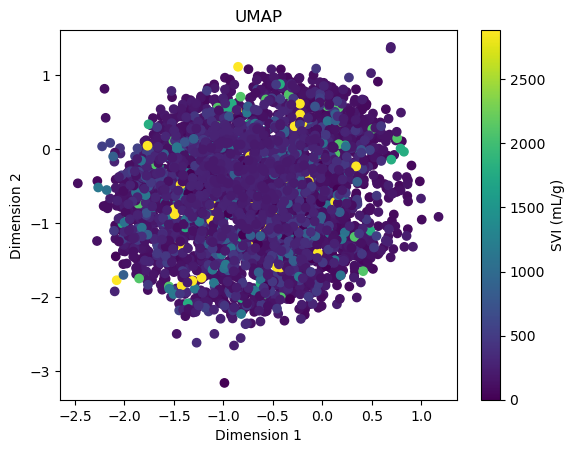

In [ ]:
# create 2D figure
plt.figure()
sc=plt.scatter(embeddings_all_visualisation[:,0], embeddings_all_visualisation[:,1], c=all_labels)
cbar = plt.colorbar(sc)
cbar.set_label('SVI (mL/g)') 
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title(f"UMAP")
plt.savefig('results/visualisation/parametric_UMAP/2Dscatter_plot_all_images_edgedetection.pdf')
plt.savefig('results/visualisation/parametric_UMAP/2Dscatter_plot_all_images_edgedetection.png')
plt.show()

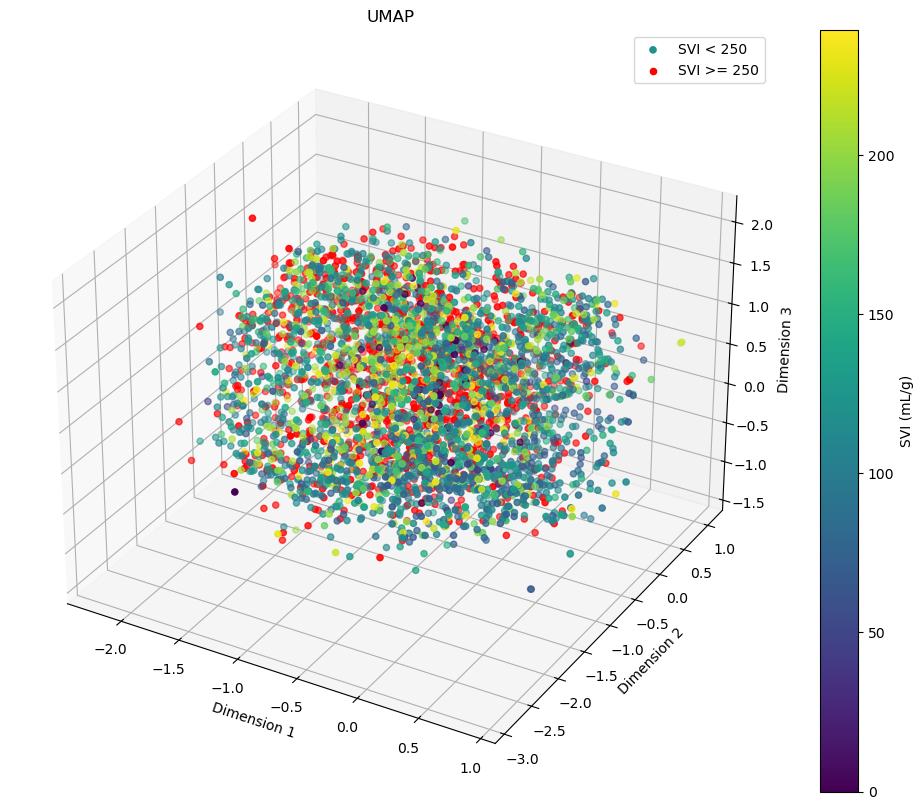

In [11]:
# 3D plot with outliers (SVI>250 in a different colour)
threshold = 250
image_labels2 = all_labels.ravel()
outliers = (image_labels2 > threshold).ravel()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embeddings_all_visualisation[~outliers, 0], 
                embeddings_all_visualisation[~outliers, 1], 
                embeddings_all_visualisation[~outliers, 2], 
                c=all_labels[~outliers], cmap='viridis', label='SVI < 250')
ax.scatter(embeddings_all_visualisation[outliers, 0], 
           embeddings_all_visualisation[outliers, 1], 
           embeddings_all_visualisation[outliers, 2], c='red', label='SVI >= 250')
cbar = plt.colorbar(sc)
cbar.set_label('SVI (mL/g)')
plt.legend()
#ax.view_init(elev=25, azim=30)  # Change elevation and azimuth angles
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_xlim(min(embeddings_all_visualisation[:, 0]), max(embeddings_all_visualisation[:, 0])*0.95)  # Example zoom for x-axis
ax.set_ylim(min(embeddings_all_visualisation[:, 1]), max(embeddings_all_visualisation[:, 1])*0.95)  # Example zoom for y-axis
ax.set_zlim(min(embeddings_all_visualisation[:, 2]), max(embeddings_all_visualisation[:, 2])*0.95)  # Example zoom for z-axis
plt.tight_layout() 
plt.title(f"UMAP")
plt.savefig('results/visualisation/parametric_UMAP/3Dscatter_plot_all_images_edgedetection.pdf')
plt.savefig('results/visualisation/parametric_UMAP/3Dscatter_plot_all_images_edgedetection.png')
plt.show()

### Save embeddings for HM

To create embeddings to be used in hybrid model, only train images are used. Afterwards, embeddings for all images are created (for evaluation).

In [2]:
base_folder = "data/microscope_images"
train_images = extract_images(base_folder, image_type='train')
train_images_processed=preprocess_images(train_images, size=(250,200), method='edges', flatten=True, show_example=False)

all_images = extract_images(base_folder, image_type='all')
all_images_processed=preprocess_images(all_images, size=(250,200), method='edges', flatten=True, show_example=False)


/opt/miniconda3/envs/LV_pytorch/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Epoch 1/10


/opt/miniconda3/envs/LV_pytorch/lib/python3.11/site-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


958/958 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - loss: 0.4901
Epoch 2/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - loss: 0.4595
Epoch 3/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - loss: 0.4586
Epoch 4/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - loss: 0.4585
Epoch 5/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - loss: 0.4585
Epoch 6/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - loss: 0.4585
Epoch 7/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - loss: 0.4584
Epoch 8/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - loss: 0.4585
Epoch 9/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - loss: 0.4582
Epoch 10/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - loss: 0.4582


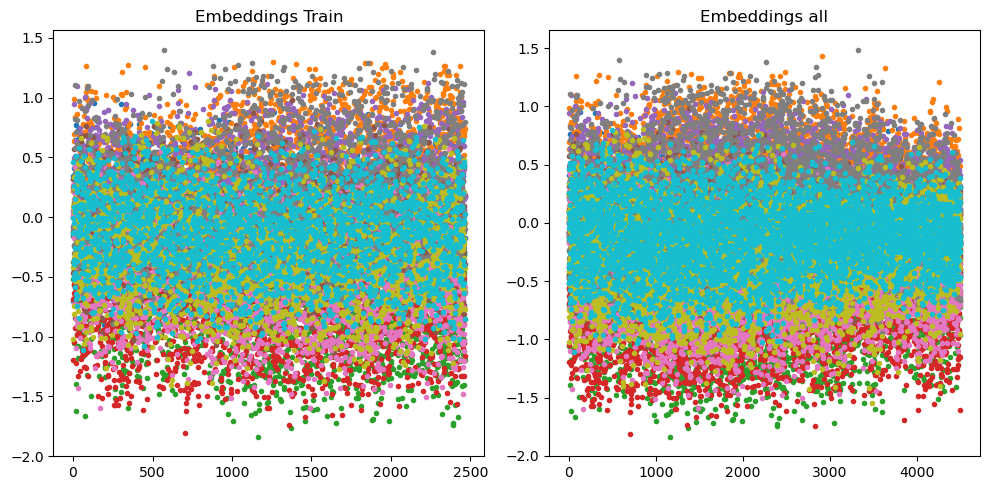

In [4]:
reducer = ParametricUMAP(n_components=10)
embeddings_train = reducer.fit_transform(train_images_processed)
embeddings_all = reducer.transform(all_images_processed)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
axes[0].plot(embeddings_train, '.')
axes[0].set_title('Embeddings Train')
axes[1].plot(embeddings_all, '.')
axes[1].set_title('Embeddings all')
plt.tight_layout()
plt.savefig('results/embeddings/parametric_UMAP/embeddings_visualized.pdf')
plt.show()

embeddings_train_df = pd.DataFrame(embeddings_train)
embeddings_all_df = pd.DataFrame(embeddings_all)

embeddings_train_df.to_csv('results/embeddings/parametric_UMAP/parametric_UMAP_embeddings_10D_train.csv', index=False)
embeddings_all_df.to_csv('results/embeddings/parametric_UMAP/parametric_UMAP_embeddings_10D_all.csv', index=False)
